In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("../Data_Preprocessing/edit_nnz.csv")

In [151]:
mask = df['Cconst'] == 0
zero_rows = df[mask]
len(zero_rows)

144

In [152]:
df = df[~mask]

Код выше вычисляет количество нулей, и удаляет их

In [153]:
lg_columns = [col for col in df.columns if 'lg' in col]

# Выводим DataFrame, ограничиваясь только выбранными столбцами
result_df = df[lg_columns]
result_df

,lgCmin,lgCmax,lgCconst,lgCcat,lgvolume
0,0.176091,0.176091,2.000000,-4.581699,1.838352
1,0.176091,0.176091,2.000000,-4.581699,3.419637
2,-0.301030,1.397940,2.000000,-4.581699,1.838352
3,-0.301030,1.397940,2.000000,-4.581699,3.419637
4,-0.698970,2.000000,1.176091,-4.581699,4.167498
...,...,...,...,...,...
808,-2.000000,-0.221849,3.301030,-1.384164,1.555542
809,-2.000000,-0.221849,3.301030,-1.384164,2.312556
810,-2.000000,-0.221849,3.301030,-1.384164,3.341830
831,-2.000000,-0.301030,1.000000,-1.522879,6.438384


In [154]:
columns_of_interest = ['Cmin', 'Cmax','Cconst','Ccat']

# Проверьте выбранные столбцы на наличие 0
zero_columns = (df[columns_of_interest] == 0).any()

# Выведите количество строк с 0 в выбранных столбцах
count_zero_rows = len(df[df[columns_of_interest].any(axis=1) & (df[columns_of_interest] == 0).any(axis=1)])

count_zero_rows


6

In [155]:
zero_columns

Cmin       True
Cmax      False
Cconst    False
Ccat      False
dtype: bool

In [156]:
df = df[~(df[columns_of_interest].any(axis=1) & (df[columns_of_interest] == 0).any(axis=1))]

In [157]:
columns_to_drop = ['Cmin', 'Cmax','Ccat','id','Vmax']
df = df.drop(columns=columns_to_drop)

In [158]:
df

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
0,0.0065,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713
1,0.0554,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903
2,0.0355,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362
3,0.2277,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328
4,0.0173,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.698970,...,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0.2700,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,127.53,59.557802,5.992739,6.000000,-0.398299,0.037337,-2.133673,191.458847,0.0,-3.200659
809,0.6400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,127.53,59.557802,5.992739,6.000000,-0.398299,0.037337,-2.133673,191.458847,0.0,-2.886057
810,0.3400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,127.53,59.557803,5.992739,6.000000,-0.398299,0.037337,-2.133673,191.458847,0.0,-3.142668
831,0.0160,1,2.7010,1.2100,0.4540,4.0,50.0,3,7.0,-2.000000,...,63.37,-1.036531,5.992739,6.000000,-0.398299,0.037337,-1.556408,0.999968,0.0,-4.725842


In [159]:
df.to_csv('edit_nnz_1.csv', index=False)

In [160]:
df = pd.read_csv("../Data_Preprocessing/edit_nnz_1.csv")

In [161]:
df.describe()

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,1.575142,1.013062,2.536609,1.210457,0.235998,4.432612,33.700581,2.683599,5.923948,-1.481741,...,59.334731,16.472109,6.130217,6.026046,-0.351785,-0.063315,-0.904544,149.498794,78.480406,-3.842720
std,3.091012,0.147076,0.272273,0.177881,0.530908,1.124191,9.408692,0.659264,1.666468,1.184587,...,128.589916,37.335627,1.201793,0.980478,0.103144,0.151789,1.013976,937.961687,439.832906,1.304476
min,0.000200,1.000000,1.830000,0.700000,-1.358000,2.000000,20.000000,1.000000,0.000000,-4.000000,...,0.000000,-21.400000,0.000000,0.000000,-0.744035,-0.254557,-2.508322,0.000000,0.000000,-7.468521
25%,0.109000,1.000000,2.280000,1.088000,-0.084400,4.000000,25.000000,3.000000,5.600000,-2.301030,...,0.000000,0.000000,5.992739,5.992739,-0.398299,-0.254557,-2.048433,0.000000,0.000000,-4.531653
50%,0.308000,1.000000,2.582000,1.224000,0.026500,4.000000,34.000000,3.000000,7.000000,-1.301030,...,12.530000,0.000000,5.992739,6.000000,-0.398299,0.037337,0.000000,0.373245,0.000000,-4.008774
75%,1.140000,1.000000,2.750000,1.320000,0.501200,4.500000,40.000000,3.000000,7.000000,-0.698970,...,63.320000,6.500000,6.000000,6.000000,-0.254557,0.037337,0.000000,1.000032,0.000000,-3.459545
max,16.540000,3.000000,3.170000,1.710000,1.690000,9.000000,90.000000,3.000000,7.000000,2.000000,...,1109.380000,153.000000,11.503714,11.503714,0.000000,0.322471,0.000000,11696.537820,4830.000000,4.777318


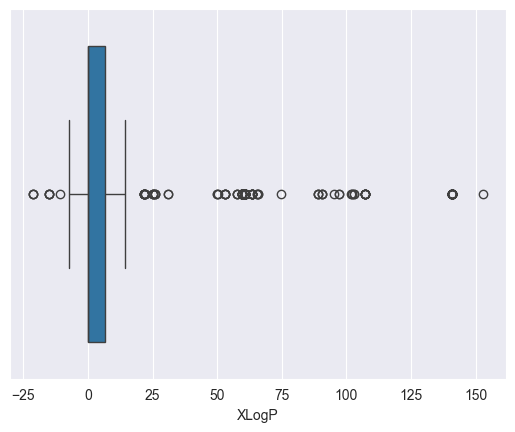

In [162]:
sns.boxplot(x=df['XLogP'])
plt.show()

<Axes: >

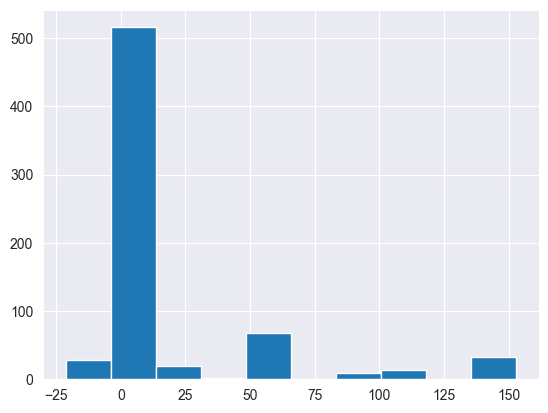

In [163]:

df['XLogP'].hist()

In [164]:
df['Cconst'] = df['Cconst'].replace(0, np.nan) 

In [165]:
df['Cconst'].value_counts()  

Cconst
1.000       44
100.000     42
0.100       42
10.000      36
0.800       29
            ..
0.140        1
142.828      1
1045.000     1
1.270        1
0.350        1
Name: count, Length: 109, dtype: int64

In [166]:
df_nan = df.isna().mean().sort_values(ascending = False)                 

In [167]:
df_nan

Km                    0.0
activity              0.0
MinEStateIndex        0.0
EState_VSA6           0.0
VSA_EState4           0.0
PEOE_VSA8             0.0
MinPartialCharge      0.0
EState_VSA4           0.0
SMR_VSA7              0.0
Complexity1           0.0
TPSA1                 0.0
TPSA2                 0.0
TPSA                  0.0
XLogP                 0.0
MaxEStateIndex.1      0.0
MaxEStateIndex.2      0.0
MinPartialCharge.1    0.0
MaxPartialCharge.1    0.0
BCUT2D_CHGLO          0.0
polym                 0.0
Complexity            0.0
MinAbsEStateIndex     0.0
BalabanJ              0.0
Kappa2                0.0
lgCmax                0.0
X                     0.0
IR                    0.0
pot2                  0.0
ph                    0.0
temp                  0.0
dstr                  0.0
cryst                 0.0
lgCmin                0.0
lgCconst              0.0
VSA_EState8           0.0
Cconst                0.0
lgCcat                0.0
lgvolume              0.0
Mcoat       

In [168]:
df['Cconst']. median ()    

4.0

In [169]:
df['Cconst'] = df['Cconst'].replace(np.nan, 3.5)

In [170]:
df.describe()

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,1.575142,1.013062,2.536609,1.210457,0.235998,4.432612,33.700581,2.683599,5.923948,-1.481741,...,59.334731,16.472109,6.130217,6.026046,-0.351785,-0.063315,-0.904544,149.498794,78.480406,-3.842720
std,3.091012,0.147076,0.272273,0.177881,0.530908,1.124191,9.408692,0.659264,1.666468,1.184587,...,128.589916,37.335627,1.201793,0.980478,0.103144,0.151789,1.013976,937.961687,439.832906,1.304476
min,0.000200,1.000000,1.830000,0.700000,-1.358000,2.000000,20.000000,1.000000,0.000000,-4.000000,...,0.000000,-21.400000,0.000000,0.000000,-0.744035,-0.254557,-2.508322,0.000000,0.000000,-7.468521
25%,0.109000,1.000000,2.280000,1.088000,-0.084400,4.000000,25.000000,3.000000,5.600000,-2.301030,...,0.000000,0.000000,5.992739,5.992739,-0.398299,-0.254557,-2.048433,0.000000,0.000000,-4.531653
50%,0.308000,1.000000,2.582000,1.224000,0.026500,4.000000,34.000000,3.000000,7.000000,-1.301030,...,12.530000,0.000000,5.992739,6.000000,-0.398299,0.037337,0.000000,0.373245,0.000000,-4.008774
75%,1.140000,1.000000,2.750000,1.320000,0.501200,4.500000,40.000000,3.000000,7.000000,-0.698970,...,63.320000,6.500000,6.000000,6.000000,-0.254557,0.037337,0.000000,1.000032,0.000000,-3.459545
max,16.540000,3.000000,3.170000,1.710000,1.690000,9.000000,90.000000,3.000000,7.000000,2.000000,...,1109.380000,153.000000,11.503714,11.503714,0.000000,0.322471,0.000000,11696.537820,4830.000000,4.777318


<Axes: >

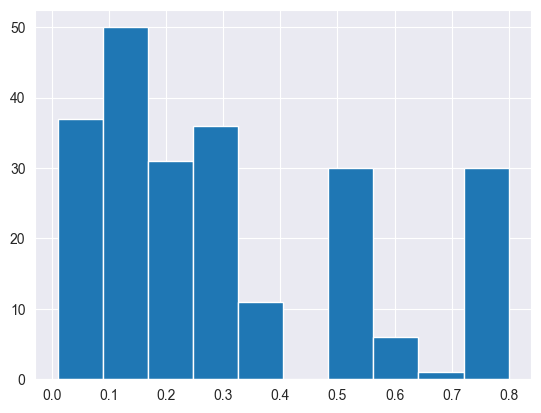

In [171]:
q1 = df['Cconst'].quantile(0)
q2 = df['Cconst'].quantile(0.3)
df[df['Cconst'].between(q1,q2)]['Cconst'].hist()

<Figure size 640x480 with 0 Axes>

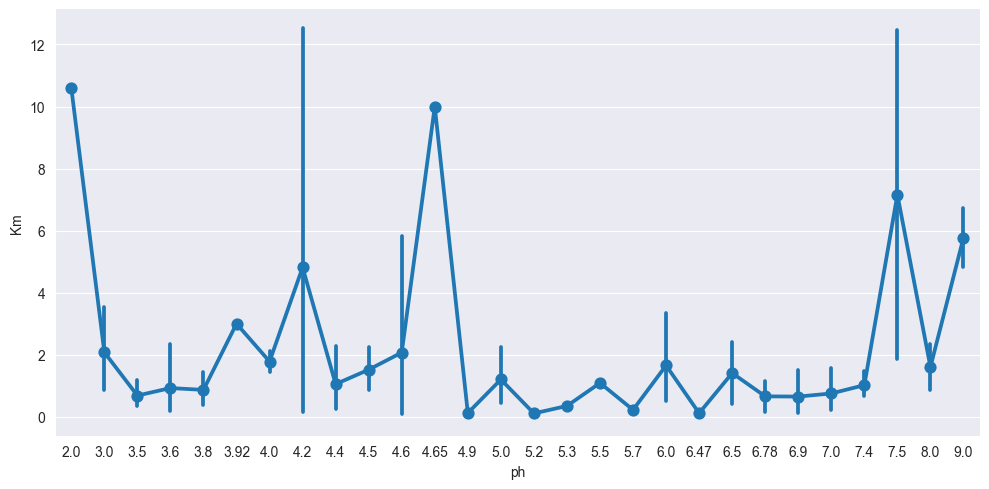

In [172]:
for i, col in enumerate(['ph']):
  plt.figure(i)
  sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2,)

In [173]:
df['Complexity1']

0      226.0
1      226.0
2        0.0
3        0.0
4      226.0
       ...  
684    226.0
685    226.0
686    226.0
687    226.0
688      0.0
Name: Complexity1, Length: 689, dtype: float64

<Figure size 640x480 with 0 Axes>

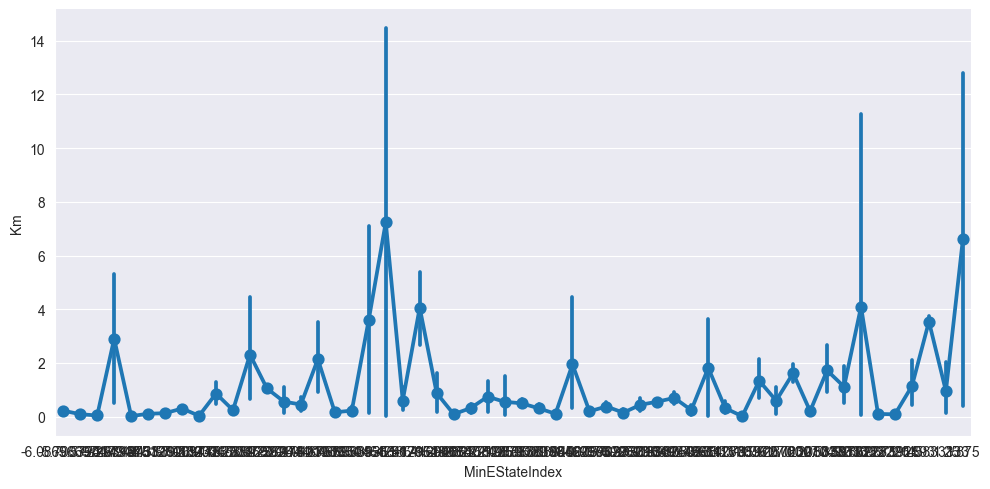

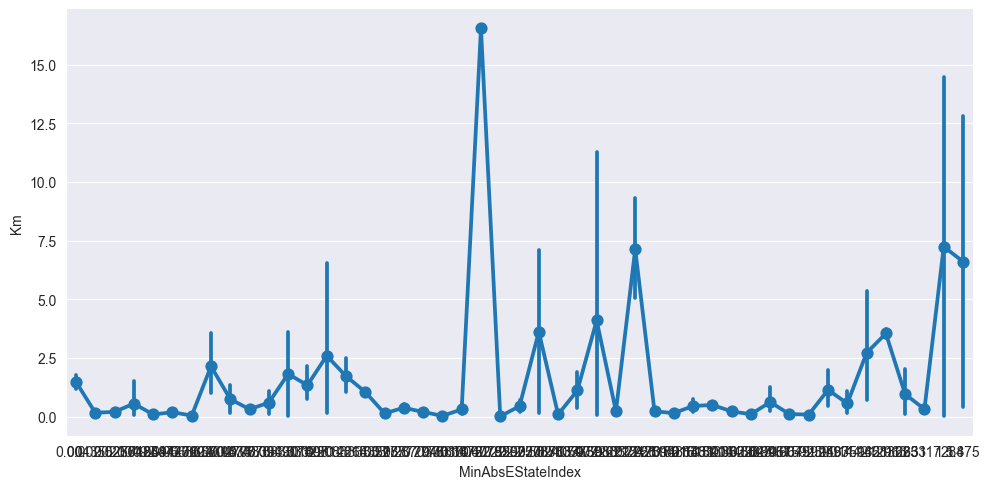

In [174]:
# Combine SibSp & Parch
for i, col in enumerate(['MinEStateIndex', 'MinAbsEStateIndex']):
  plt.figure(i)
  sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2) 

In [175]:
df['MinEStateIndex_group'] = pd.qcut(df['MinEStateIndex'],10,duplicates='drop')

In [176]:
df['MinAbsEStateIndex_group'] = pd.qcut(df['MinAbsEStateIndex'],10,duplicates='drop')

<Figure size 640x480 with 0 Axes>

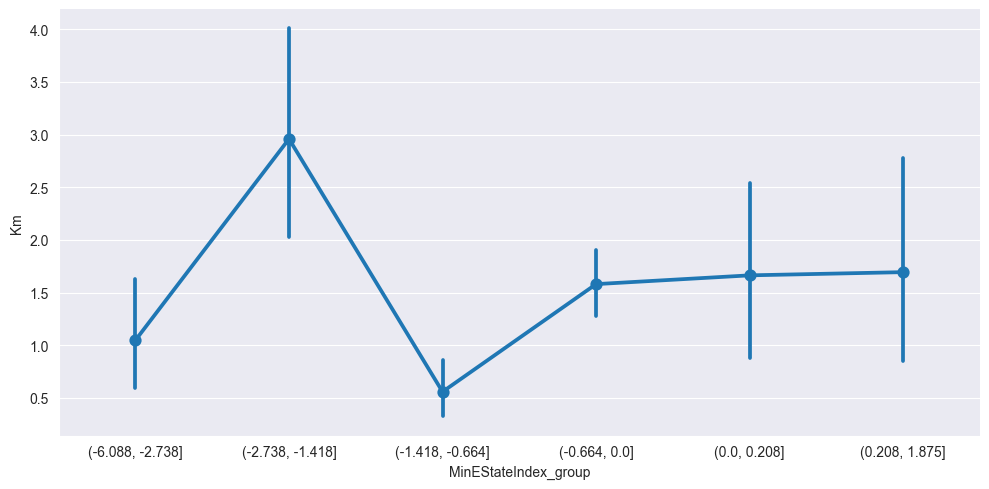

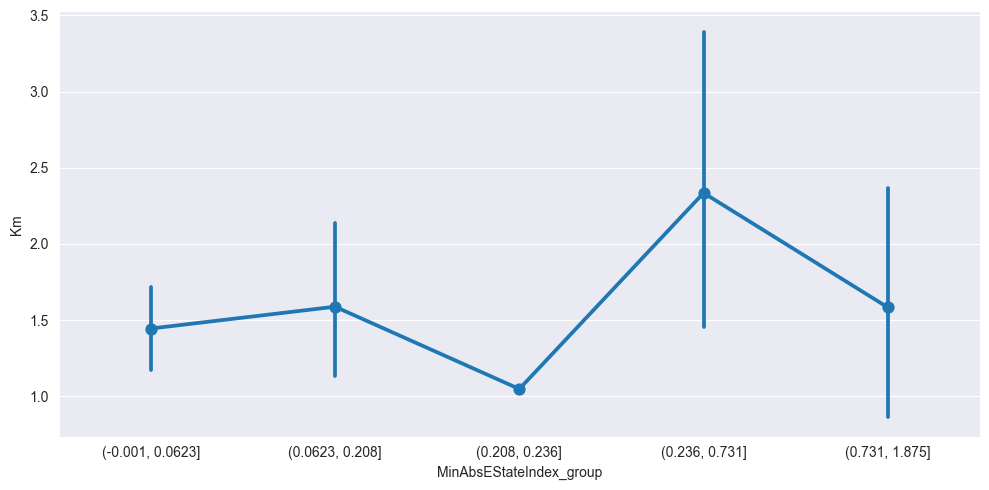

In [177]:
for i, col in enumerate(['MinEStateIndex_group', 'MinAbsEStateIndex_group']):
  plt.figure(i)
  sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2) 

In [178]:
df.groupby('MinAbsEStateIndex_group',dropna=False)['Km'].agg(['count','mean'])

C:\Users\user\AppData\Local\Temp\ipykernel_19136\690676126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MinAbsEStateIndex_group',dropna=False)['Km'].agg(['count','mean'])


,count,mean
MinAbsEStateIndex_group,,
"(-0.001, 0.0623]",417,1.443879
"(0.0623, 0.208]",133,1.587314
"(0.208, 0.236]",1,1.047000
"(0.236, 0.731]",70,2.334311
"(0.731, 1.875]",68,1.582559


<Axes: >

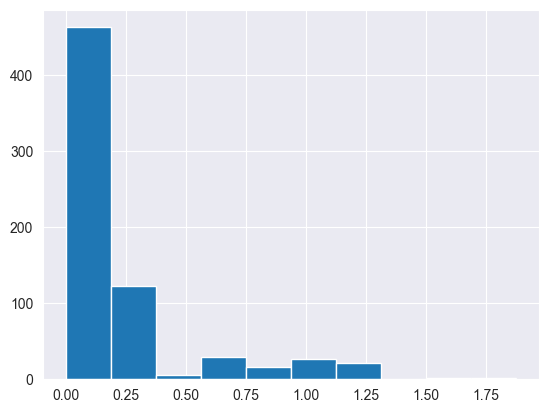

In [179]:
df['MinAbsEStateIndex'].hist()

In [180]:
df.columns[15:]

Index(['Mcoat', 'Sufrace', 'MolWt', 'PEOE_VSA7', 'PEOE_VSA9', 'VSA_EState8',
       'Kappa2', 'BalabanJ', 'MinAbsEStateIndex', 'MinEStateIndex',
       'EState_VSA6', 'VSA_EState4', 'PEOE_VSA8', 'MinPartialCharge',
       'EState_VSA4', 'SMR_VSA7', 'Complexity1', 'TPSA1', 'TPSA2', 'TPSA',
       'XLogP', 'MaxEStateIndex.1', 'MaxEStateIndex.2', 'MinPartialCharge.1',
       'MaxPartialCharge.1', 'BCUT2D_CHGLO', 'polym', 'Complexity', 'Vmax_log',
       'MinEStateIndex_group', 'MinAbsEStateIndex_group'],
      dtype='object')

<Axes: >

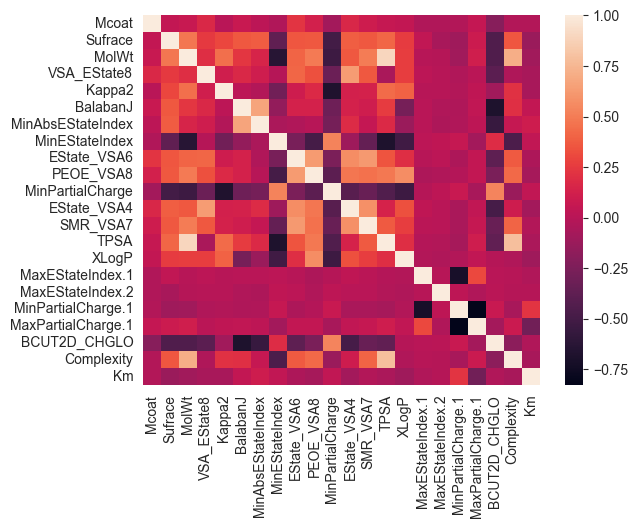

In [181]:

sns.heatmap(df[['Mcoat', 'Sufrace', 'MolWt', 'VSA_EState8',
       'Kappa2', 'BalabanJ', 'MinAbsEStateIndex', 'MinEStateIndex',
       'EState_VSA6', 'PEOE_VSA8', 'MinPartialCharge',
       'EState_VSA4', 'SMR_VSA7','TPSA',
       'XLogP', 'MaxEStateIndex.1', 'MaxEStateIndex.2', 'MinPartialCharge.1',
       'MaxPartialCharge.1', 'BCUT2D_CHGLO', 'Complexity','Km']].corr())

In [182]:
df['MolWt']. corr(df['TPSA'])
df['MolWt']. corr(df['Complexity'])

0.7092231906064198

In [183]:
df['MolWt'] = df['MolWt'].replace(0, np.nan)  
df['TPSA'] = df['TPSA'].replace(0, np.nan)  

In [184]:
df.loc[:, 'lgMolWt'] = np.log10(df['MolWt'])
df.loc[:, 'lgTPSA'] = np.log10(df['TPSA'])

In [185]:
df['MolWt_group'] = pd.qcut(df['lgMolWt'], 10, duplicates='drop')
df['TPSA_group'] = pd.qcut(df['lgTPSA'], 10, duplicates='drop')

<Figure size 640x480 with 0 Axes>

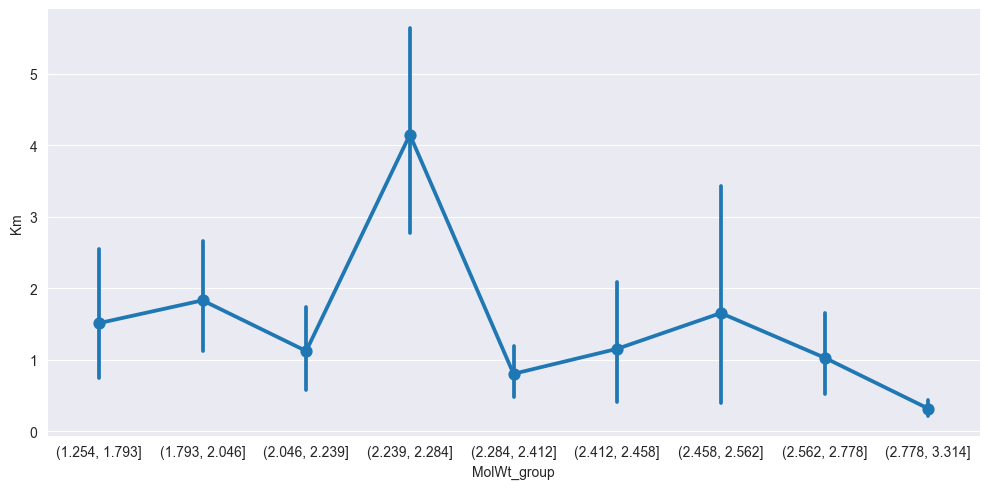

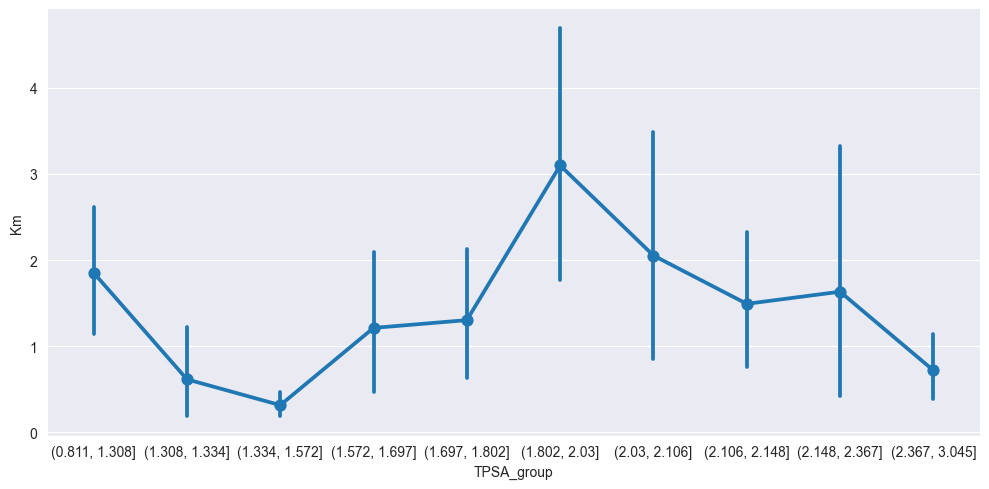

In [186]:

for i, col in enumerate(['MolWt_group', 'TPSA_group']):
    plt.figure(i)
    sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2) 

<Axes: >

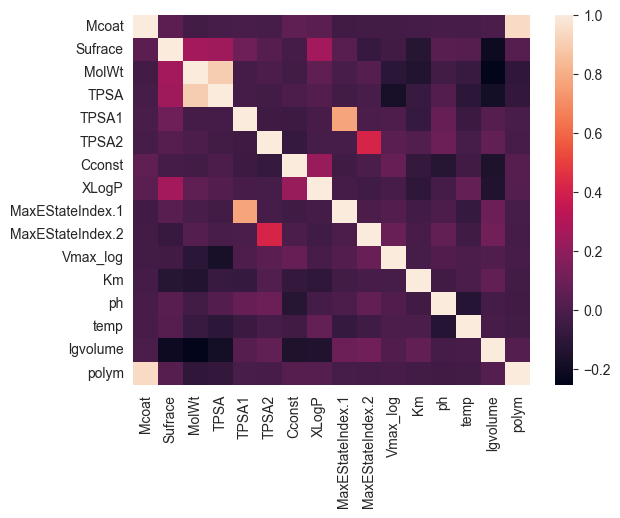

In [187]:

sns.heatmap(df[['Mcoat', 'Sufrace', 'MolWt','TPSA','TPSA1','TPSA2', 'Cconst',
       'XLogP', 'MaxEStateIndex.1', 'MaxEStateIndex.2', 'Vmax_log','Km','ph', 'temp','lgvolume','polym']].corr())

Удаляем столбец polym т.е. сильная корреляция с Mcoat

In [188]:
df['Mcoat']. corr(df['polym'])


0.9435162377930848

In [189]:
df.columns[:]

Index(['Km', 'activity', 'X', 'IR', 'pot2', 'ph', 'temp', 'dstr', 'cryst',
       'lgCmin', 'lgCmax', 'lgCconst', 'Cconst', 'lgCcat', 'lgvolume', 'Mcoat',
       'Sufrace', 'MolWt', 'PEOE_VSA7', 'PEOE_VSA9', 'VSA_EState8', 'Kappa2',
       'BalabanJ', 'MinAbsEStateIndex', 'MinEStateIndex', 'EState_VSA6',
       'VSA_EState4', 'PEOE_VSA8', 'MinPartialCharge', 'EState_VSA4',
       'SMR_VSA7', 'Complexity1', 'TPSA1', 'TPSA2', 'TPSA', 'XLogP',
       'MaxEStateIndex.1', 'MaxEStateIndex.2', 'MinPartialCharge.1',
       'MaxPartialCharge.1', 'BCUT2D_CHGLO', 'polym', 'Complexity', 'Vmax_log',
       'MinEStateIndex_group', 'MinAbsEStateIndex_group', 'lgMolWt', 'lgTPSA',
       'MolWt_group', 'TPSA_group'],
      dtype='object')

In [190]:
df['polym'] = df['polym'].replace(0, np.nan)
df['Mcoat'] = df['Mcoat'].replace(0, np.nan)

In [191]:

df.loc[:, 'lgpolym'] = np.log10(df['polym'])
df.loc[:, 'lgMcoat'] = np.log10(df['Mcoat'])

In [192]:

df['polym_group'] = pd.qcut(df['polym'], 10, duplicates='drop')
df['Mcoat_group'] = pd.qcut(df['Mcoat'], 10, duplicates='drop')

<Figure size 640x480 with 0 Axes>

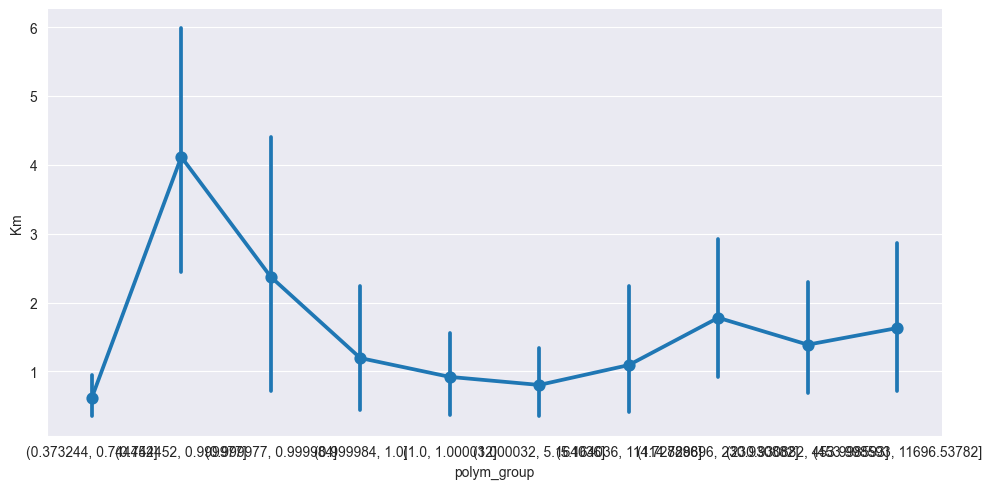

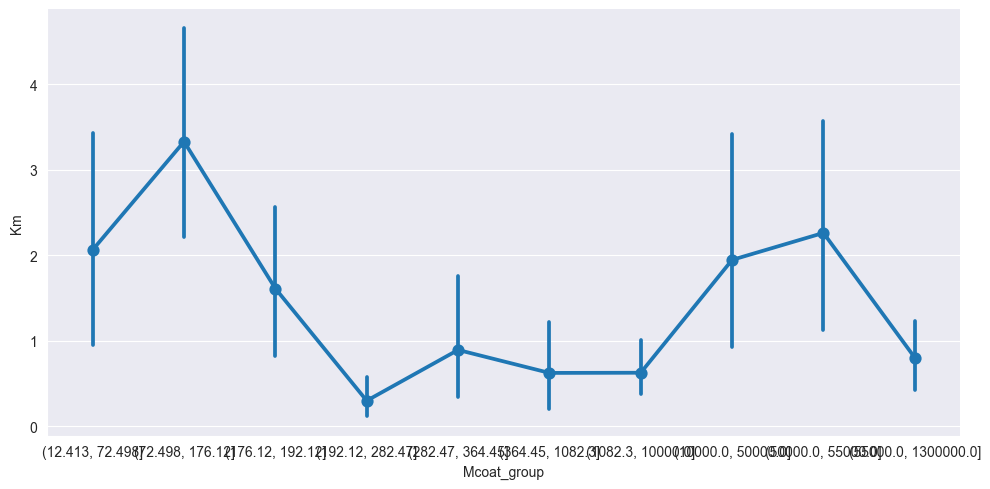

In [193]:

for i, col in enumerate(['polym_group', 'Mcoat_group']):
    plt.figure(i)
    sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2) 

In [194]:


# Применяем гиперболический тангенс (tanh) к колонке 'values'
df['edit_BalabanJ'] = np.tanh(df['BalabanJ'])
df

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,MinAbsEStateIndex_group,lgMolWt,lgTPSA,MolWt_group,TPSA_group,lgpolym,lgMcoat,polym_group,Mcoat_group,edit_BalabanJ
0,0.0065,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,"(0.236, 0.731]",2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01
1,0.0554,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,"(0.236, 0.731]",2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01
2,0.0355,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,"(0.236, 0.731]",2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01
3,0.2277,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,"(0.236, 0.731]",2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01
4,0.0173,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.698970,...,"(0.236, 0.731]",2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0.2700,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,"(0.0623, 0.208]",2.458287,2.105612,"(2.412, 2.458]","(2.03, 2.106]",2.282075,4.740363,"(114.728896, 230.930882]","(50000.0, 55000.0]",2.170000e-07
685,0.6400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,"(0.0623, 0.208]",2.458287,2.105612,"(2.412, 2.458]","(2.03, 2.106]",2.282075,4.740363,"(114.728896, 230.930882]","(50000.0, 55000.0]",2.170000e-07
686,0.3400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,"(0.0623, 0.208]",2.458287,2.105612,"(2.412, 2.458]","(2.03, 2.106]",2.282075,4.740363,"(114.728896, 230.930882]","(50000.0, 55000.0]",2.170000e-07
687,0.0160,1,2.7010,1.2100,0.4540,4.0,50.0,3,7.0,-2.000000,...,"(0.731, 1.875]",1.799423,1.801884,"(1.793, 2.046]","(1.802, 2.03]",-0.000014,1.799409,"(0.744452, 0.999977]","(12.413, 72.498]",9.926760e-01


In [195]:
df['cut_BalabanJ'] = pd.qcut(df['edit_BalabanJ'], 10, duplicates='drop')

<Figure size 640x480 with 0 Axes>

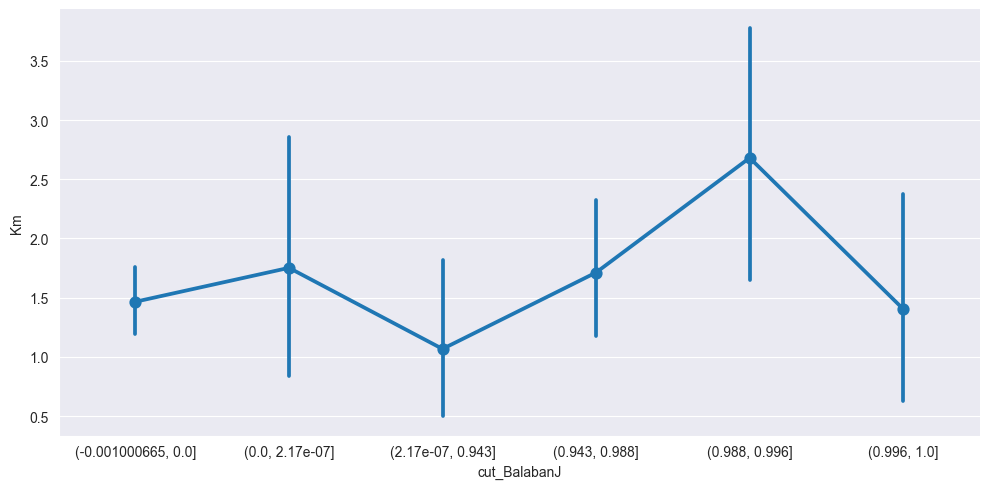

In [196]:

for i, col in enumerate(['cut_BalabanJ']):
    plt.figure(i)
    sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2) 

In [198]:
df

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,lgMolWt,lgTPSA,MolWt_group,TPSA_group,lgpolym,lgMcoat,polym_group,Mcoat_group,edit_BalabanJ,cut_BalabanJ
0,0.0065,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01,"(0.988, 0.996]"
1,0.0554,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01,"(0.988, 0.996]"
2,0.0355,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01,"(0.988, 0.996]"
3,0.2277,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01,"(0.988, 0.996]"
4,0.0173,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.698970,...,2.450969,1.571709,"(2.412, 2.458]","(1.334, 1.572]",0.000003,2.450972,"(1.0, 1.000032]","(192.12, 282.47]",9.956663e-01,"(0.988, 0.996]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0.2700,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,2.458287,2.105612,"(2.412, 2.458]","(2.03, 2.106]",2.282075,4.740363,"(114.728896, 230.930882]","(50000.0, 55000.0]",2.170000e-07,"(0.0, 2.17e-07]"
685,0.6400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,2.458287,2.105612,"(2.412, 2.458]","(2.03, 2.106]",2.282075,4.740363,"(114.728896, 230.930882]","(50000.0, 55000.0]",2.170000e-07,"(0.0, 2.17e-07]"
686,0.3400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,2.458287,2.105612,"(2.412, 2.458]","(2.03, 2.106]",2.282075,4.740363,"(114.728896, 230.930882]","(50000.0, 55000.0]",2.170000e-07,"(0.0, 2.17e-07]"
687,0.0160,1,2.7010,1.2100,0.4540,4.0,50.0,3,7.0,-2.000000,...,1.799423,1.801884,"(1.793, 2.046]","(1.802, 2.03]",-0.000014,1.799409,"(0.744452, 0.999977]","(12.413, 72.498]",9.926760e-01,"(0.988, 0.996]"


In [239]:
df = pd.read_csv("../Data_Preprocessing/edit_nnz.csv")

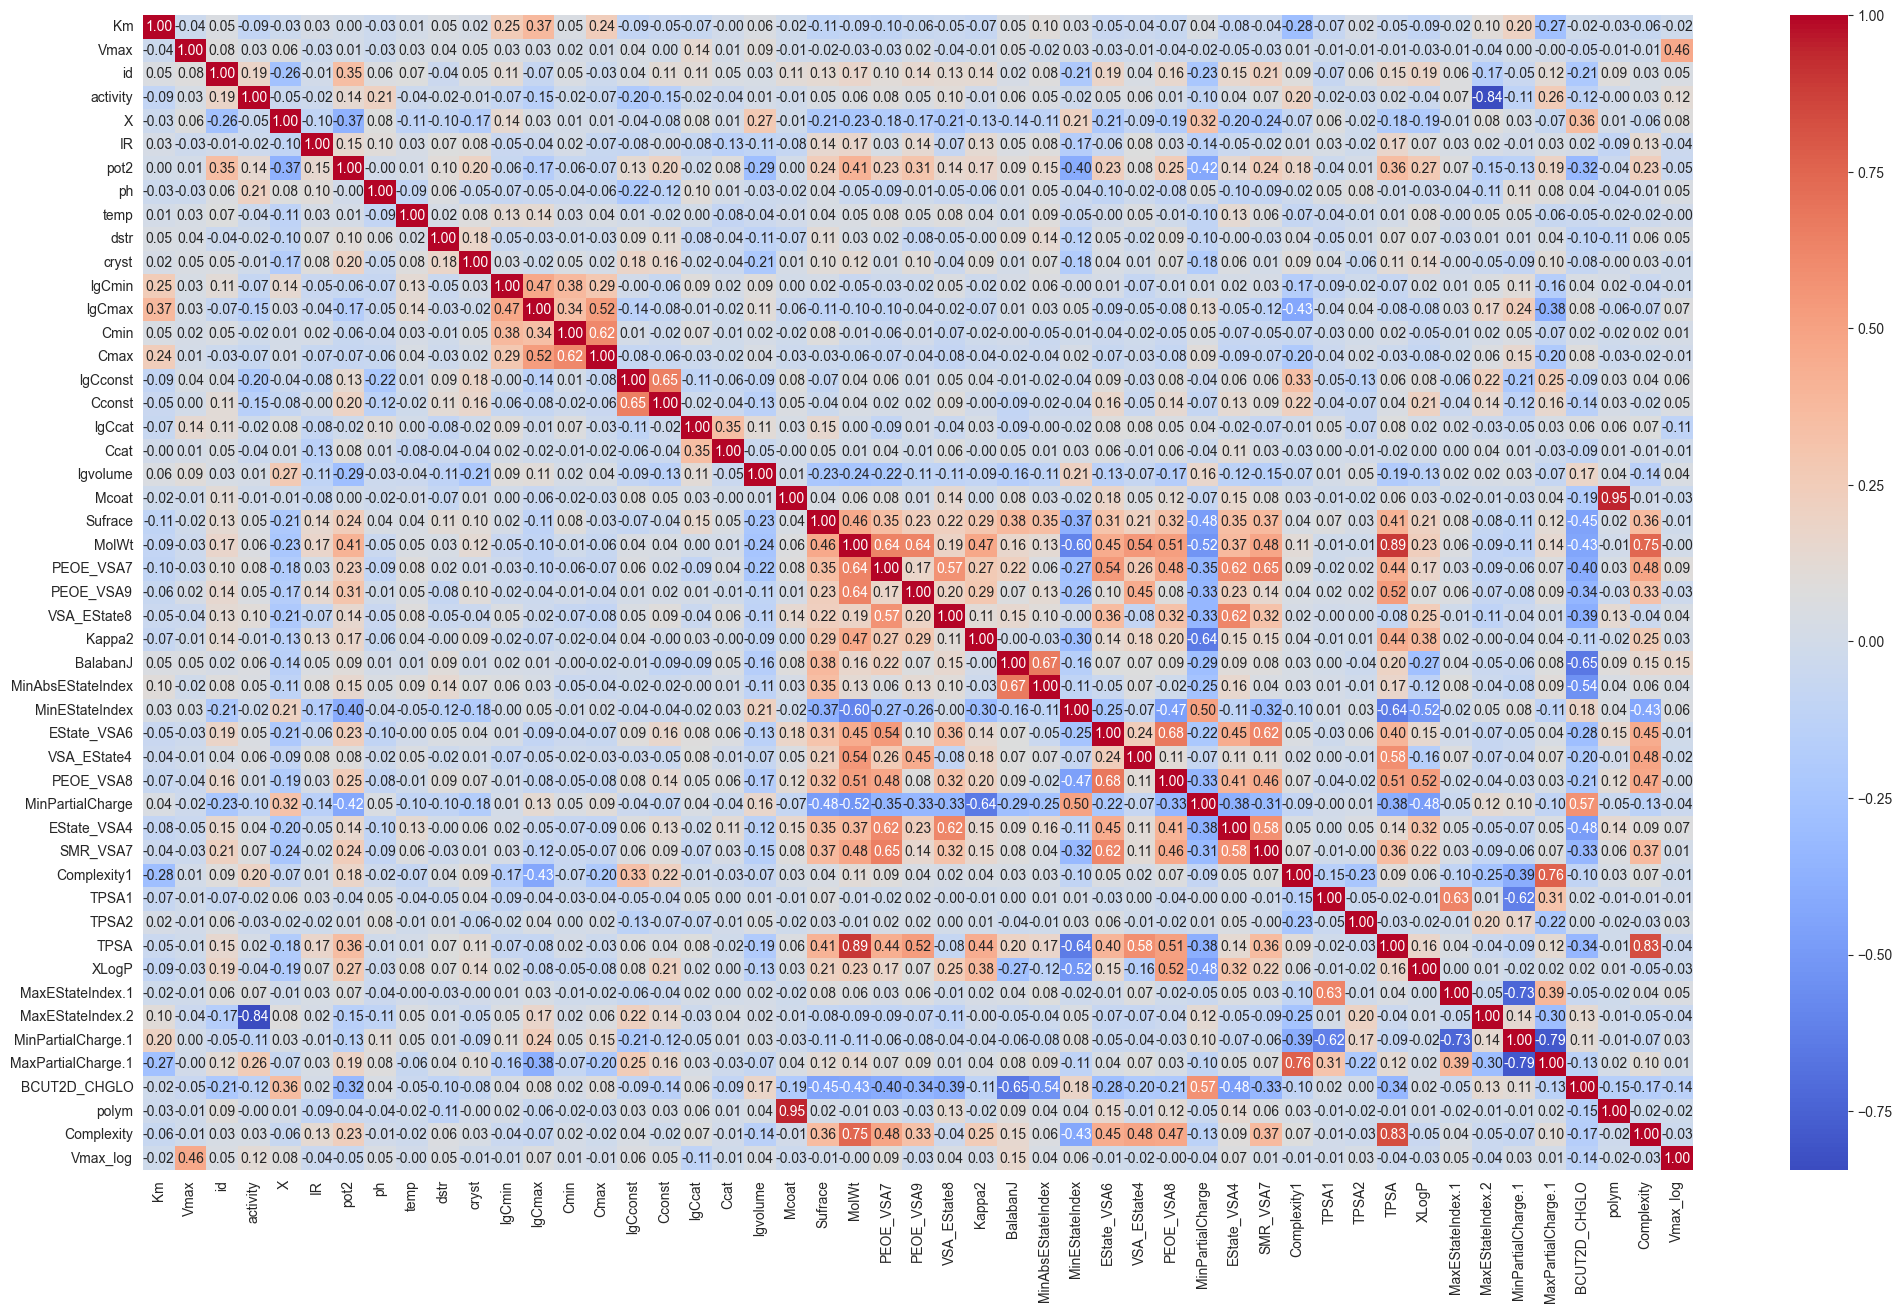

In [208]:
# Построение матрицы корреляции
correlation_matrix = df.corr()

# Настройка размера графика
plt.figure(figsize=(25, 15))

# Создание тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Отображение графика
plt.show()

In [210]:
df['activity']. corr(df['MaxEStateIndex.2'])

-0.8441019318848303

In [209]:
df.columns[:]

Index(['Km', 'Vmax', 'id', 'activity', 'X', 'IR', 'pot2', 'ph', 'temp', 'dstr',
       'cryst', 'lgCmin', 'lgCmax', 'Cmin', 'Cmax', 'lgCconst', 'Cconst',
       'lgCcat', 'Ccat', 'lgvolume', 'Mcoat', 'Sufrace', 'MolWt', 'PEOE_VSA7',
       'PEOE_VSA9', 'VSA_EState8', 'Kappa2', 'BalabanJ', 'MinAbsEStateIndex',
       'MinEStateIndex', 'EState_VSA6', 'VSA_EState4', 'PEOE_VSA8',
       'MinPartialCharge', 'EState_VSA4', 'SMR_VSA7', 'Complexity1', 'TPSA1',
       'TPSA2', 'TPSA', 'XLogP', 'MaxEStateIndex.1', 'MaxEStateIndex.2',
       'MinPartialCharge.1', 'MaxPartialCharge.1', 'BCUT2D_CHGLO', 'polym',
       'Complexity', 'Vmax_log'],
      dtype='object')

In [212]:
df.corr()

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
Km,1.000000,-0.035669,0.053512,-0.093189,-0.032914,0.026993,0.001586,-0.031240,0.009583,0.047882,...,-0.051242,-0.089057,-0.017429,0.101695,0.203180,-0.272097,-0.017450,-0.026422,-0.064014,-0.018660
Vmax,-0.035669,1.000000,0.081371,0.033771,0.064970,-0.027992,0.009714,-0.031184,0.029241,0.035314,...,-0.011912,-0.034985,-0.008756,-0.040390,0.002633,-0.004677,-0.051914,-0.011711,-0.014214,0.464391
id,0.053512,0.081371,1.000000,0.185478,-0.264402,-0.008285,0.351504,0.058941,0.071697,-0.042469,...,0.147267,0.185751,0.064214,-0.165945,-0.053685,0.119684,-0.211272,0.091663,0.031286,0.046859
activity,-0.093189,0.033771,0.185478,1.000000,-0.045268,-0.023142,0.141006,0.213882,-0.036083,-0.015021,...,0.019901,-0.042345,0.066599,-0.844102,-0.113670,0.255311,-0.119111,-0.002740,0.032270,0.115200
X,-0.032914,0.064970,-0.264402,-0.045268,1.000000,-0.101655,-0.367735,0.076908,-0.114261,-0.096776,...,-0.182131,-0.190724,-0.009751,0.083950,0.032331,-0.065518,0.357295,0.009700,-0.063279,0.080302
IR,0.026993,-0.027992,-0.008285,-0.023142,-0.101655,1.000000,0.149859,0.095572,0.025754,0.072436,...,0.167271,0.070115,0.027531,0.023350,-0.008476,0.028780,0.016665,-0.094306,0.129415,-0.037593
pot2,0.001586,0.009714,0.351504,0.141006,-0.367735,0.149859,1.000000,-0.003872,0.013802,0.100211,...,0.358589,0.267082,0.069243,-0.148427,-0.126749,0.187067,-0.324012,-0.037691,0.229999,-0.046009
ph,-0.031240,-0.031184,0.058941,0.213882,0.076908,0.095572,-0.003872,1.000000,-0.092234,0.060390,...,-0.011954,-0.034936,-0.037582,-0.105115,0.106286,0.080521,0.035465,-0.041036,-0.006435,0.047409
temp,0.009583,0.029241,0.071697,-0.036083,-0.114261,0.025754,0.013802,-0.092234,1.000000,0.022683,...,0.011660,0.083060,-0.002317,0.052510,0.048541,-0.060350,-0.046880,-0.022812,-0.024100,-0.004351
dstr,0.047882,0.035314,-0.042469,-0.015021,-0.096776,0.072436,0.100211,0.060390,0.022683,1.000000,...,0.074840,0.074315,-0.029400,0.009329,0.011464,0.041408,-0.103145,-0.110141,0.059939,0.051692


In [219]:
columns_to_plot = ['TPSA', 'MaxEStateIndex.2', 'activity', 'Mcoat', 'polym', 'MolWt', 'Complexity1', 'Complexity', 'MaxPartialCharge.1', 'MinPartialCharge.1']
subset_df = df[columns_to_plot]

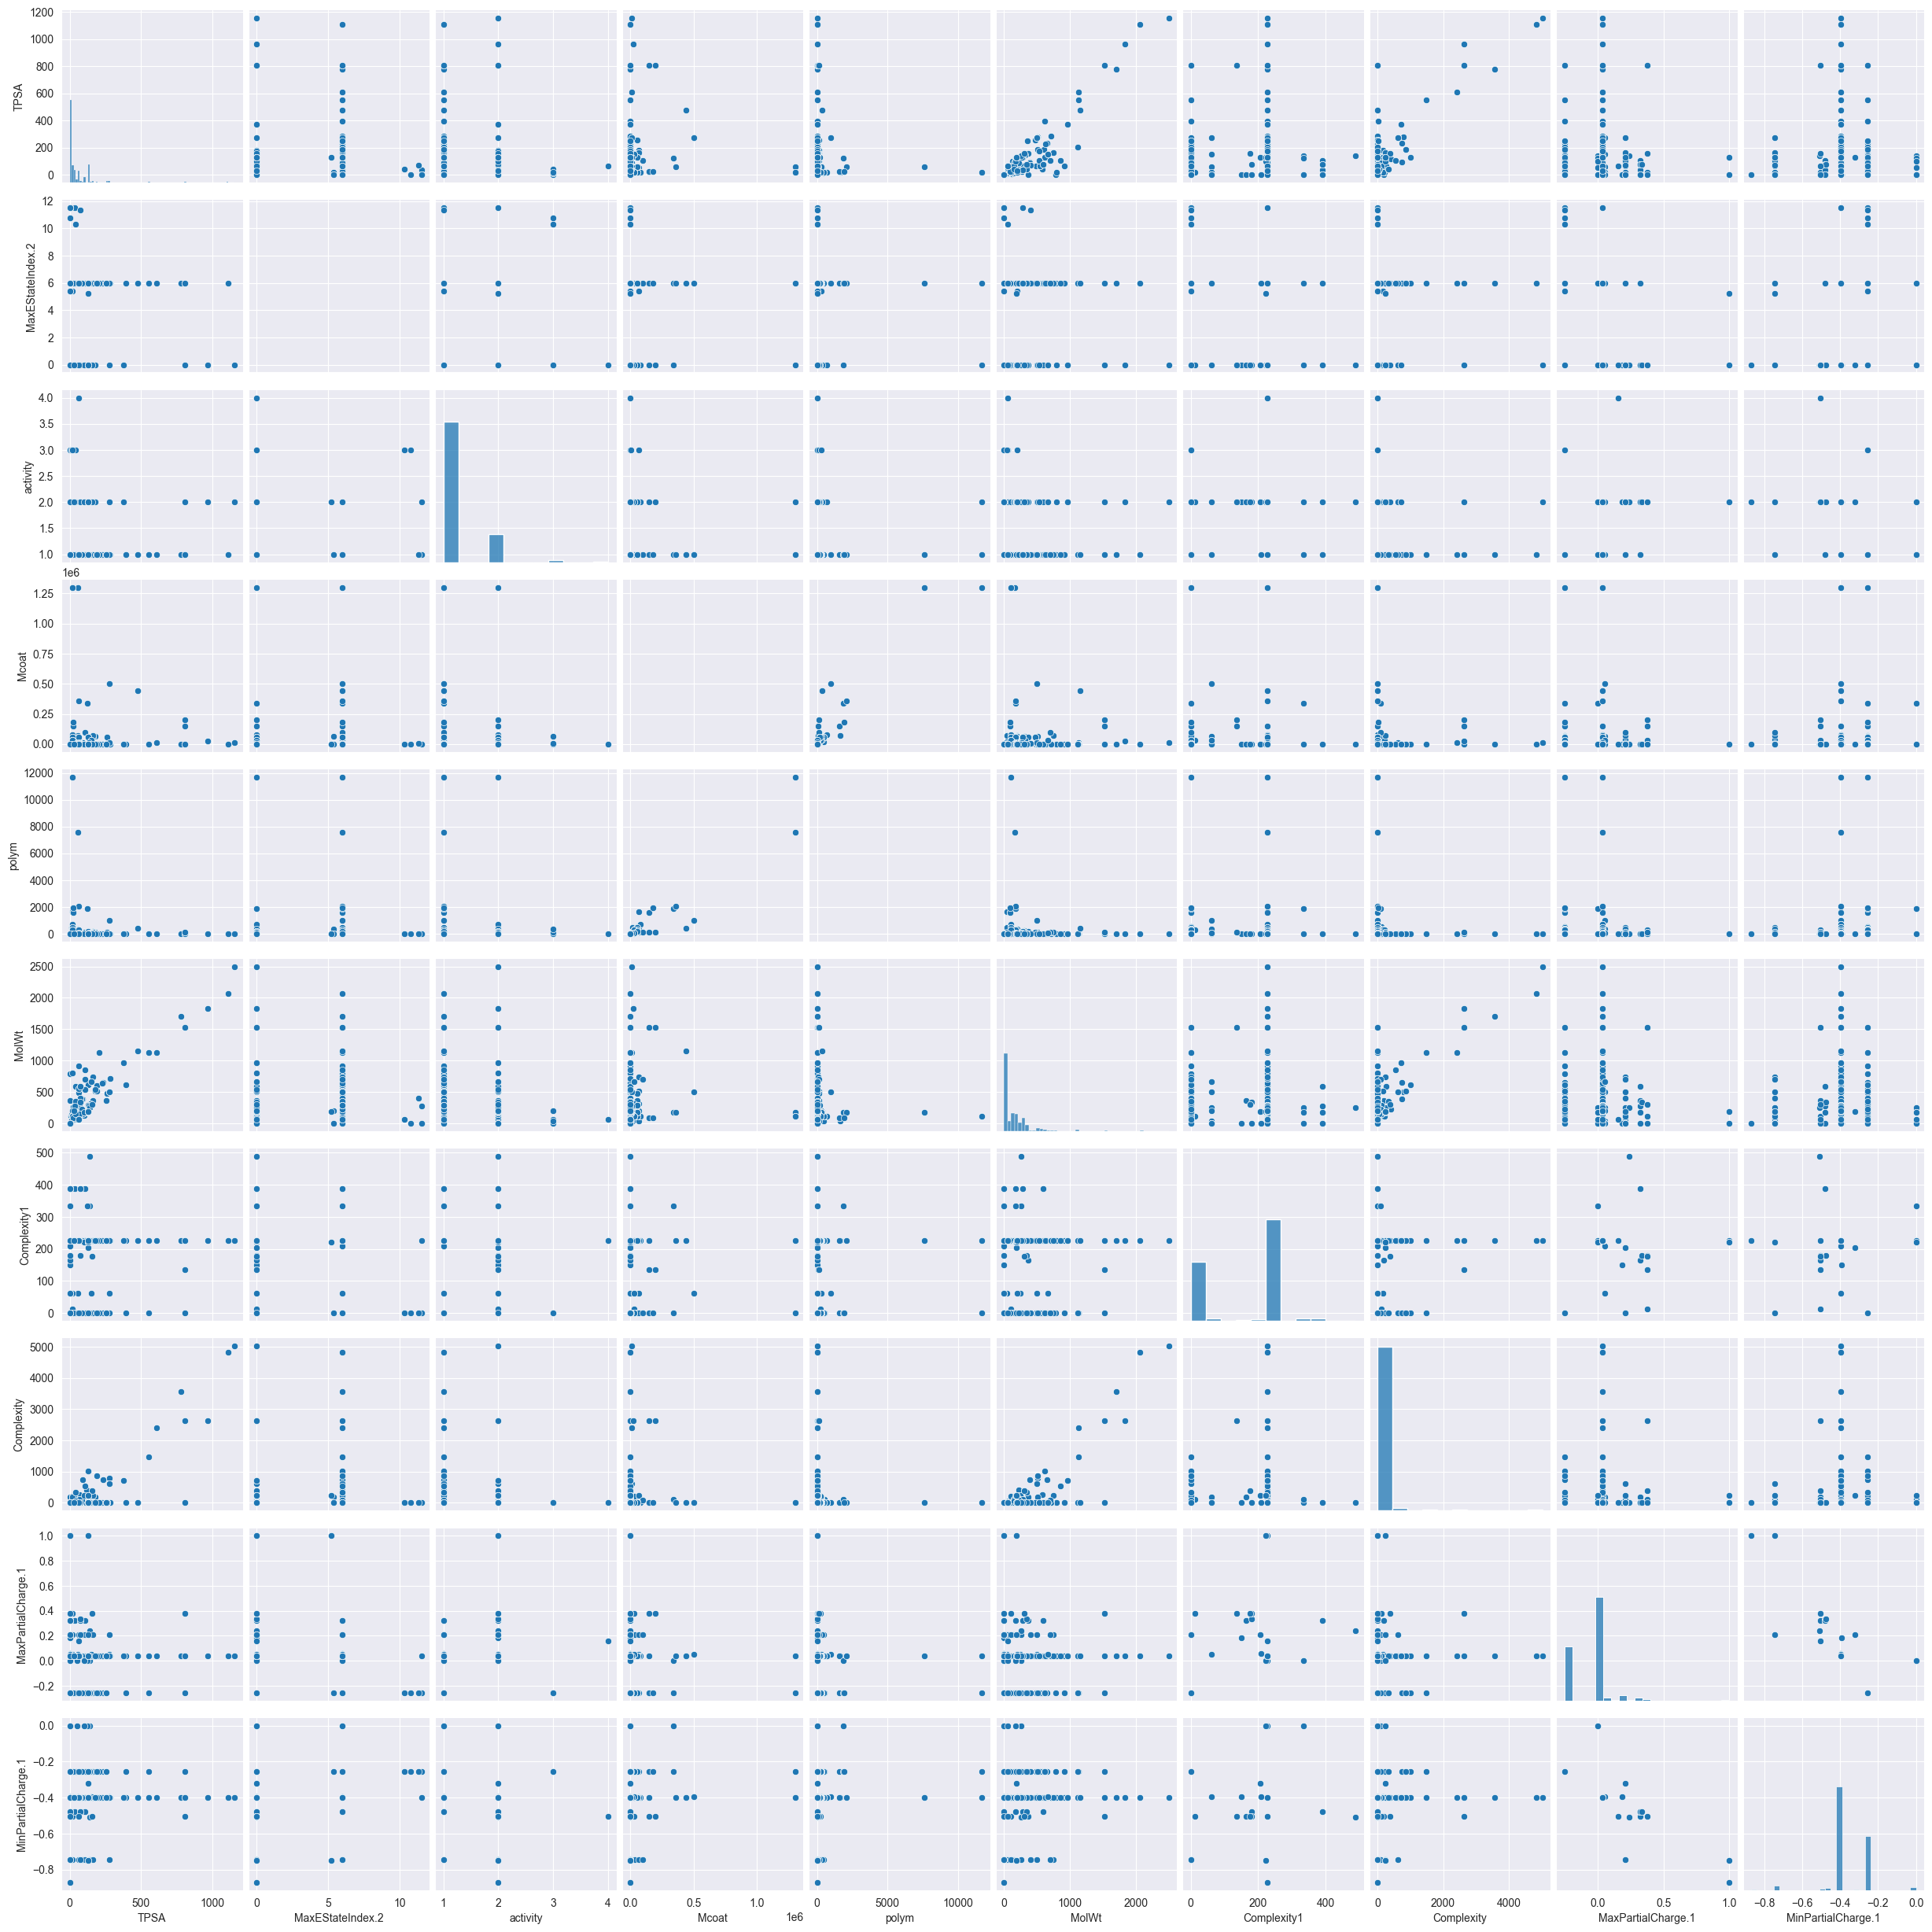

In [220]:
sns.pairplot(subset_df)
plt.show()

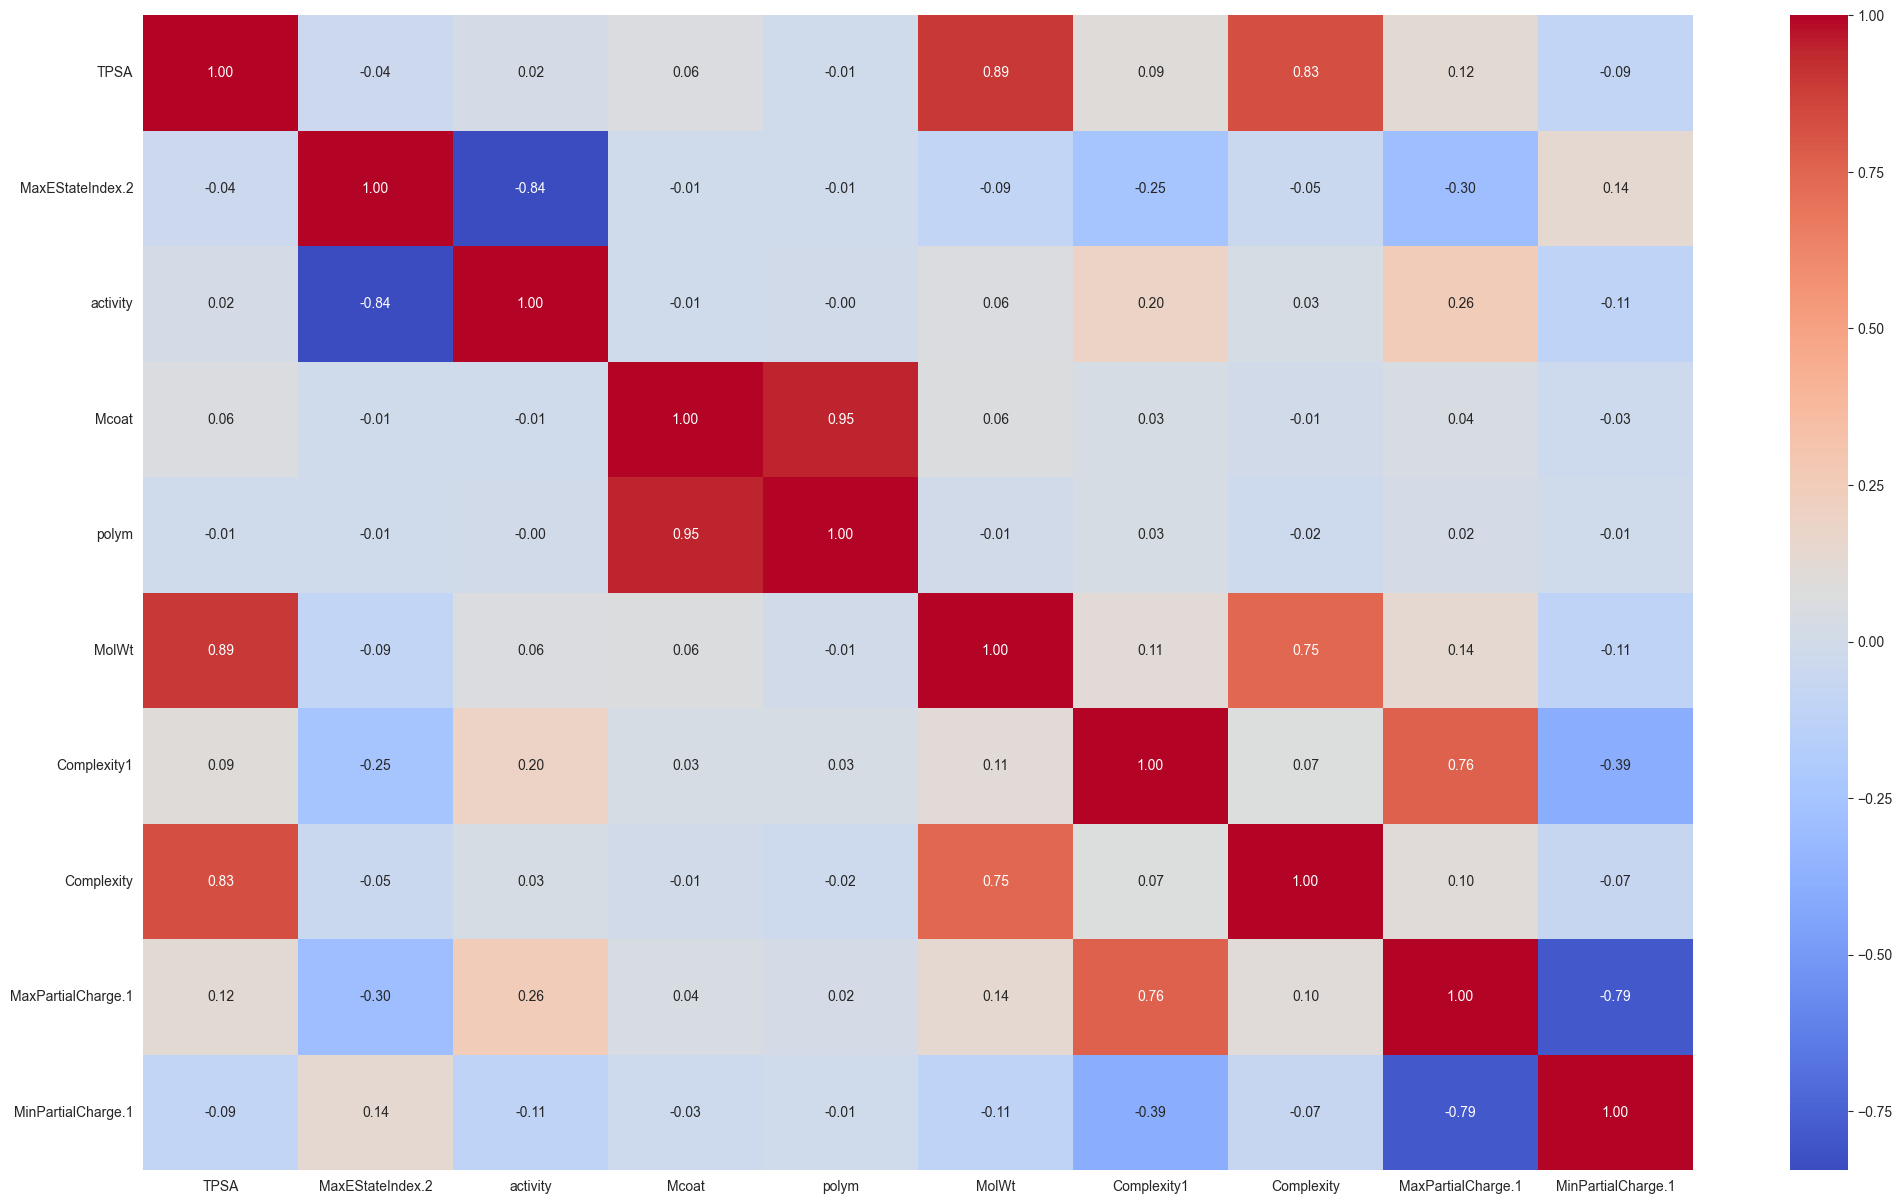

In [225]:
# Построение матрицы корреляции
correlation_matrix = subset_df.corr()

# Настройка размера графика
plt.figure(figsize=(25, 15))

# Создание тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Отображение графика
plt.show()

In [213]:
df.columns[:]

Index(['Km', 'Vmax', 'id', 'activity', 'X', 'IR', 'pot2', 'ph', 'temp', 'dstr',
       'cryst', 'lgCmin', 'lgCmax', 'Cmin', 'Cmax', 'lgCconst', 'Cconst',
       'lgCcat', 'Ccat', 'lgvolume', 'Mcoat', 'Sufrace', 'MolWt', 'PEOE_VSA7',
       'PEOE_VSA9', 'VSA_EState8', 'Kappa2', 'BalabanJ', 'MinAbsEStateIndex',
       'MinEStateIndex', 'EState_VSA6', 'VSA_EState4', 'PEOE_VSA8',
       'MinPartialCharge', 'EState_VSA4', 'SMR_VSA7', 'Complexity1', 'TPSA1',
       'TPSA2', 'TPSA', 'XLogP', 'MaxEStateIndex.1', 'MaxEStateIndex.2',
       'MinPartialCharge.1', 'MaxPartialCharge.1', 'BCUT2D_CHGLO', 'polym',
       'Complexity', 'Vmax_log'],
      dtype='object')

In [240]:
columns_to_drop = ['polym','TPSA','MaxEStateIndex.2','id']

# Используйте метод drop для удаления указанных столбцов
df.drop(columns=columns_to_drop, inplace=True)


In [234]:
df.shape

(839, 46)

In [241]:
df.to_csv('edit_nnz_clean.csv', index=False)

In [303]:
df = pd.read_csv("../Data_Preprocessing/edit_nnz_clean.csv")

In [304]:
df.drop('Vmax', axis=1, inplace=True)

In [305]:
df.drop('Cconst', axis=1, inplace=True)

In [306]:
df

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,Complexity1,TPSA1,TPSA2,XLogP,MaxEStateIndex.1,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,Complexity,Vmax_log
0,0.0065,1,2.757,1.071,-0.05,4.0,37.0,3,7.0,0.176091,...,226.0,52.0,40.50,6.5,5.992739,-0.398299,0.037337,-1.987595,0.0,0.138713
1,0.0554,1,2.757,1.071,-0.05,4.0,37.0,3,7.0,0.176091,...,226.0,52.0,40.50,6.5,5.992739,-0.398299,0.037337,-1.987595,0.0,-0.577903
2,0.0355,1,2.757,1.071,-0.05,4.0,37.0,3,7.0,-0.301030,...,0.0,40.5,52.00,6.5,6.000000,-0.254557,-0.254557,-1.987595,0.0,0.922362
3,0.2277,1,2.757,1.071,-0.05,4.0,37.0,3,7.0,-0.301030,...,0.0,40.5,52.00,6.5,6.000000,-0.254557,-0.254557,-1.987595,0.0,-0.358328
4,0.0173,1,2.757,1.071,-0.05,4.0,37.0,3,7.0,-0.698970,...,226.0,52.0,40.50,6.5,5.992739,-0.398299,0.037337,-1.987595,0.0,0.011655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.0550,2,2.280,1.350,1.20,3.0,41.4,3,6.8,-2.000000,...,226.0,52.0,45.78,-1.7,5.992739,-0.398299,0.037337,-2.178395,0.0,-3.330683
835,0.1220,2,2.280,1.350,1.20,7.0,41.4,3,6.8,-1.221849,...,226.0,52.0,45.78,-1.7,5.992739,-0.398299,0.037337,-2.178395,0.0,-5.821023
836,0.0270,2,2.280,1.350,1.20,3.0,33.0,1,6.8,-2.000000,...,226.0,52.0,40.50,-10.8,5.992739,-0.398299,0.037337,-2.441399,725.0,-3.598599
837,0.0350,2,2.280,1.350,1.20,7.0,33.0,1,6.8,-1.221849,...,226.0,52.0,40.50,-10.8,5.992739,-0.398299,0.037337,-2.441399,725.0,-3.752027


In [342]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [328]:
# Train Test Split
features = df.drop('Km', axis=1)
labels = df['Km']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [329]:
for data in [y_train, y_val, y_test]:
  print(round(len(data) / len(labels), 2))

0.6
0.2
0.2


In [330]:
# Save the data
X_train.to_csv('../Data_ML/train_features.csv', index=False)
X_val.to_csv('../Data_ML/val_features.csv', index=False)
X_test.to_csv('../Data_ML/test_features.csv', index=False)

y_train.to_csv('../Data_ML/train_labels.csv', index=False)
y_val.to_csv('../Data_ML/val_labels.csv', index=False)
y_test.to_csv('../Data_ML/test_labels.csv', index=False)

Cross Validation

In [331]:
train_features = pd.read_csv('../Data_ML/train_features.csv')
train_labels = pd.read_csv('../Data_ML/train_labels.csv')

val_features = pd.read_csv('../Data_ML/val_features.csv')
val_labels = pd.read_csv('../Data_ML/val_labels.csv')

test_features = pd.read_csv('../Data_ML/test_features.csv')
test_labels = pd.read_csv('../Data_ML/test_labels.csv')

In [332]:
rf = RandomForestRegressor()

scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)

In [333]:
scores

array([0.25321833, 0.32025145, 0.11038684, 0.25424668, 0.35431469])

Hyperparameter Tuning

In [334]:
rf = RandomForestRegressor()

hyperparams = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [2, 12, 24, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(train_features, train_labels.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 12, 24, None],
                         'n_estimators': [5, 25, 50, 100]})

In [335]:
def results(results):
  print('Optimal Hyperparams: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))

In [336]:
results(cross_val)

Optimal Hyperparams: {'max_depth': None, 'n_estimators': 100}

Mean 0.147 Standard Deviation 0.197 Hyperparameters {'max_depth': 2, 'n_estimators': 5}
Mean 0.156 Standard Deviation 0.202 Hyperparameters {'max_depth': 2, 'n_estimators': 25}
Mean 0.174 Standard Deviation 0.181 Hyperparameters {'max_depth': 2, 'n_estimators': 50}
Mean 0.17 Standard Deviation 0.2 Hyperparameters {'max_depth': 2, 'n_estimators': 100}
Mean 0.153 Standard Deviation 0.144 Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Mean 0.268 Standard Deviation 0.174 Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Mean 0.242 Standard Deviation 0.25 Hyperparameters {'max_depth': 12, 'n_estimators': 50}
Mean 0.277 Standard Deviation 0.187 Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Mean 0.184 Standard Deviation 0.386 Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Mean 0.259 Standard Deviation 0.175 Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Mean 0.278 Standard Deviation 0.193 Hyperparam

In [337]:
rf1 = RandomForestRegressor(n_estimators=50, max_depth=12)
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestRegressor(n_estimators=100, max_depth=24)
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestRegressor(n_estimators=100, max_depth=12)
rf3.fit(train_features, train_labels.values.ravel())

RandomForestRegressor(max_depth=12)

Model Evaluation

In [343]:

for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    mse = mean_squared_error(val_labels, y_pred)
    r2 = r2_score(val_labels, y_pred)
    mae = mean_absolute_error(val_labels, y_pred)
    rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    
    print('Max Depth: {} || Estimators: {} || MSE: {:.4f} || R-squared: {:.4f} || MAE: {:.4f} || RMSE: {:.4f}'.format(
        mdl.max_depth, mdl.n_estimators, mse, r2, mae, rmse))

Max Depth: 12 || Estimators: 50 || MSE: 5.6609 || R-squared: 0.3066 || MAE: 1.2483 || RMSE: 2.3793
Max Depth: 24 || Estimators: 100 || MSE: 5.7485 || R-squared: 0.2958 || MAE: 1.2529 || RMSE: 2.3976
Max Depth: 12 || Estimators: 100 || MSE: 5.7509 || R-squared: 0.2955 || MAE: 1.2565 || RMSE: 2.3981


In [345]:
y_pred = mdl.predict(val_features)
mse = mean_squared_error(test_labels, y_pred)
r2 = r2_score(test_labels, y_pred)
mae = mean_absolute_error(test_labels, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    
print('Max Depth: {} || Estimators: {} || MSE: {:.4f} || R-squared: {:.4f} || MAE: {:.4f} || RMSE: {:.4f}'.format(
        rf1.max_depth, rf1.n_estimators, mse, r2, mae, rmse))

Max Depth: 12 || Estimators: 50 || MSE: 10.2768 || R-squared: -0.3607 || MAE: 1.7492 || RMSE: 3.2057
